# Capstone Project 1

### Analyzing New York City Crime Data for Predicting Future Crime Location 

<font color='blue'>Overview and Purpose of this Project

In a big city like New York it’s a challenging task for the Law Enforcement Agencies to maintain law and order. Imagine if we had predictive model that could predict the possible crime location? 
This is what the model is trying to achieve by analyzing New York City Crime Data along with After School Program Data for each borough and deriving a pattern between the after school educational program and the crime rate. Through this model we might be able to achieve some recommendations about where should the law enforcement agencies be placed in order to try and prevent future crimes. Furthermore we can try to forecast future crimes in the manner of months and to be able to plan strategic educational plans to prevent future crimes trends.
</font>



In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
sns.set()
import folium
from folium.plugins import HeatMap
import datetime
from datetime import date
import math
import re
from collections import Counter
from random import sample 
from wordcloud import WordCloud
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn import preprocessing
#import plotly.express as px

%matplotlib inline
#file1 = 'Data/NYPD_Arrest_Data__Year_to_Date_.csv'


# Read the Data File and set the Index
file_df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv', index_col = 'ARREST_KEY')

# set 
col_list=file_df.columns[file_df.isna().any()].tolist() # ['PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CAT_CD']

# Total No of Rows in the File
total_row_count = file_df.shape[0]

# See the Percentage of NaN Values for each of the columns that have NaN values
for i in col_list:
    col_null_count = file_df[file_df[i].isnull()][i].shape[0]
    null_percent = (col_null_count/total_row_count)*100
    round_off = str(round(null_percent, 2))
    print(i,' ---> ',round_off,'%')
    
# Since the Percentage is less than 1% we can create a Clean dataset 
# by dropping the rows where at least one element is missing.
file1_clean = file_df.dropna()

file1_clean.reset_index()

#file2_df.columns=['CONTACT_NBR','GRADE_AGE_GRP','LOCATION_1','ZIPCODE','LATITUDE','LONGITUDE','COMMUNITY_BOARD','COUNCIL_DIST','CENSUS_TRACT','BIN','BBL','NTA']

PD_CD  --->  0.02 %
PD_DESC  --->  0.03 %
KY_CD  --->  0.03 %
OFNS_DESC  --->  0.03 %
LAW_CAT_CD  --->  0.99 %


ARREST_KEY ARREST_DATE  PD_CD                         PD_DESC  KY_CD  \
0        220756993  11/19/2020  155.0                          RAPE 2  104.0   
1        220422940  11/12/2020  157.0                          RAPE 1  104.0   
2        218804160  10/06/2020  157.0                          RAPE 1  104.0   
3        218641095  10/02/2020  594.0                     OBSCENITY 1  116.0   
4        217890704  09/16/2020  155.0                          RAPE 2  104.0   
...            ...         ...    ...                             ...    ...   
138982   207543592  01/07/2020  792.0        WEAPONS POSSESSION 1 & 2  118.0   
138983   206922567  01/04/2020  507.0  CONTROLLED SUBSTANCE, POSSESSI  117.0   
138984   207760555  01/11/2020  707.0  IMPERSONATION 2, PUBLIC SERVAN  340.0   
138985   207621948  01/08/2020  793.0            WEAPONS POSSESSION 3  118.0   
138986   206894795  01/01/2020  905.0     INTOXICATED DRIVING,ALCOHOL  347.0   

                             OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0                                 RAPE  PL 1303001          F           B   
1                                 RAPE  PL 1303502          F           Q   
2                                 RAPE  PL 1303501          F           M   
3                           SEX CRIMES  PL 2631600          F           M   
4                                 RAPE  PL 1303001          F           K   
...                                ...         ...        ...         ...   
138982               DANGEROUS WEAPONS  PL 265031B          F           K   
138983                 DANGEROUS DRUGS  PL 2200602          F           Q   
138984                          FRAUDS  PL 1902300          M           S   
138985               DANGEROUS WEAPONS  PL 2650201          F           K   
138986  INTOXICATED & IMPAIRED DRIVING  VTL11920U2          M           Q   

        ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE  \
0                    41                  0     18-24        M           BLACK   
1                   112                  0     25-44        M           BLACK   
2                     7                  2     25-44        M           BLACK   
3                     5                  0     25-44        M           WHITE   
4                    77                  0     25-44        M  WHITE HISPANIC   
...                 ...                ...       ...      ...             ...   
138982               79                  0     18-24        M           BLACK   
138983              103                  0     25-44        M           WHITE   
138984              120                  0     18-24        M  WHITE HISPANIC   
138985               76                  0     25-44        M  WHITE HISPANIC   
138986              108                  0     25-44        F  WHITE HISPANIC   

        X_COORD_CD  Y_COORD_CD   Latitude  Longitude  \
0          1013232      236725  40.816392 -73.895296   
1          1025420      202485  40.722364 -73.851474   
2           988708      200317  40.716508 -73.983920   
3           984946      200203  40.716196 -73.997491   
4          1003606      185050  40.674583 -73.930222   
...            ...         ...        ...        ...   
138982      998701      190220  40.688783 -73.947893   
138983     1037559      194576  40.700591 -73.807743   
138984      959975      171772  40.638126 -74.087467   
138985      988346      187850  40.682289 -73.985233   
138986     1002427      211084  40.746043 -73.934402   

                             New Georeferenced Column  
0       POINT (-73.89529641399997 40.816391847000034)  
1        POINT (-73.85147389399998 40.72236368700004)  
2        POINT (-73.98391989899994 40.71650772200008)  
3       POINT (-73.99749074599998 40.716195914000025)  
4        POINT (-73.93022154099998 40.67458330800008)  
...                                               ...  
138982   POINT (-73.94789336099996 40.68878314700004)  
138983   POINT (-73.80774319

In [223]:
arrest_df = file1_clean

In [224]:
a = arrest_df.groupby('AGE_GROUP').count().reset_index()
a['ARREST_COUNT']=a.ARREST_DATE
a[['AGE_GROUP','ARREST_COUNT']]


AGE_GROUP  ARREST_COUNT
0     18-24         28147
1     25-44         76489
2     45-64         26776
3       65+          1733
4       <18          5842

Text(0.5, 1.0, 'Age Group vs Arrest Count')

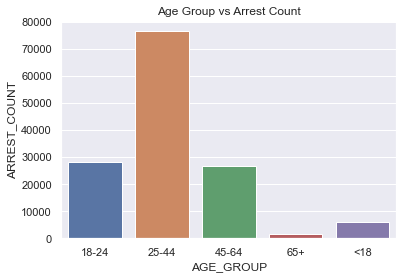

In [225]:
sns.barplot(x='AGE_GROUP',y='ARREST_COUNT',data=a)
plt.title('Age Group vs Arrest Count')

** Crime Rate is significantly high among 25-44 Age Group

In [226]:
a=pd.DataFrame(arrest_df['ARREST_BORO'].value_counts())
a.reset_index(inplace=True)
a.rename(columns={'index':'ARREST_BORO','ARREST_BORO':'ARREST_COUNT'},inplace=True)
a.head()

ARREST_BORO  ARREST_COUNT
0           K         38022
1           M         32603
2           B         32372
3           Q         29818
4           S          6172

In [227]:
type(arrest_df.ARREST_DATE)
arrest_df['ARREST_DATE_NEW']=pd.to_datetime(arrest_df['ARREST_DATE'])

<ipython-input-227-4df088a21182>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrest_df['ARREST_DATE_NEW']=pd.to_datetime(arrest_df['ARREST_DATE'])


In [228]:
new_df=arrest_df.drop('ARREST_DATE',axis=1)
new_df['ARREST_MONTH'] = pd.DatetimeIndex(new_df['ARREST_DATE_NEW']).month
new_df['ARREST_YEAR'] = pd.DatetimeIndex(new_df['ARREST_DATE_NEW']).year
#new_df['YEAR'] = date[2].astype('int32')


In [229]:
# Dataframe for Each Borough
new_df_M =new_df[new_df['ARREST_BORO']=='M']
new_df_Q =new_df[new_df['ARREST_BORO']=='Q']
new_df_B =new_df[new_df['ARREST_BORO']=='B']
new_df_X =new_df[new_df['ARREST_BORO']=='K']
new_df_S =new_df[new_df['ARREST_BORO']=='S']

In [230]:
d = {'M':'Manhattan','B':'Bronx','Q':'Queens','K':'Brooklyn','S':'Staten Island'}
new_df['BOROUGH'] = new_df['ARREST_BORO'].map(d)
new_df.head(4)

PD_CD      PD_DESC  KY_CD   OFNS_DESC    LAW_CODE LAW_CAT_CD  \
ARREST_KEY                                                                 
220756993   155.0       RAPE 2  104.0        RAPE  PL 1303001          F   
220422940   157.0       RAPE 1  104.0        RAPE  PL 1303502          F   
218804160   157.0       RAPE 1  104.0        RAPE  PL 1303501          F   
218641095   594.0  OBSCENITY 1  116.0  SEX CRIMES  PL 2631600          F   

           ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP  ...  \
ARREST_KEY                                                            ...   
220756993            B               41                  0     18-24  ...   
220422940            Q              112                  0     25-44  ...   
218804160            M                7                  2     25-44  ...   
218641095            M                5                  0     25-44  ...   

           PERP_RACE X_COORD_CD  Y_COORD_CD   Latitude  Longitude  \
ARREST_KEY                                                          
220756993      BLACK    1013232      236725  40.816392 -73.895296   
220422940      BLACK    1025420      202485  40.722364 -73.851474   
218804160      BLACK     988708      200317  40.716508 -73.983920   
218641095      WHITE     984946      200203  40.716196 -73.997491   

                                 New Georeferenced Column ARREST_DATE_NEW  \
ARREST_KEY                                                                  
220756993   POINT (-73.89529641399997 40.816391847000034)      2020-11-19   
220422940    POINT (-73.85147389399998 40.72236368700004)      2020-11-12   
218804160    POINT (-73.98391989899994 40.71650772200008)      2020-10-06   
218641095   POINT (-73.99749074599998 40.716195914000025)      2020-10-02   

           ARREST_MONTH  ARREST_YEAR    BOROUGH  
ARREST_KEY                                       
220756993            11         2020      Bronx  
220422940            11         2020     Queens  
218804160            10         2020  Manhattan  
218641095            10         2020  Manhattan  

[4 rows x 21 columns]

In [231]:
def wordcloud(df, column):
    """Creates and shows a wordcloud created of frequencies of values in input column."""
    
    # create frequncies of felony descriptions
    felonies_freq = Counter(df[column])

    # plot wordcloud
    wordcloud = WordCloud(width = 1200, height = 800, min_font_size = 14, colormap='Dark2', prefer_horizontal=0.85)
    wordcloud.generate_from_frequencies(frequencies=felonies_freq)
    plt.figure(figsize = (20, 18), facecolor = None) 
    plt.imshow(wordcloud)

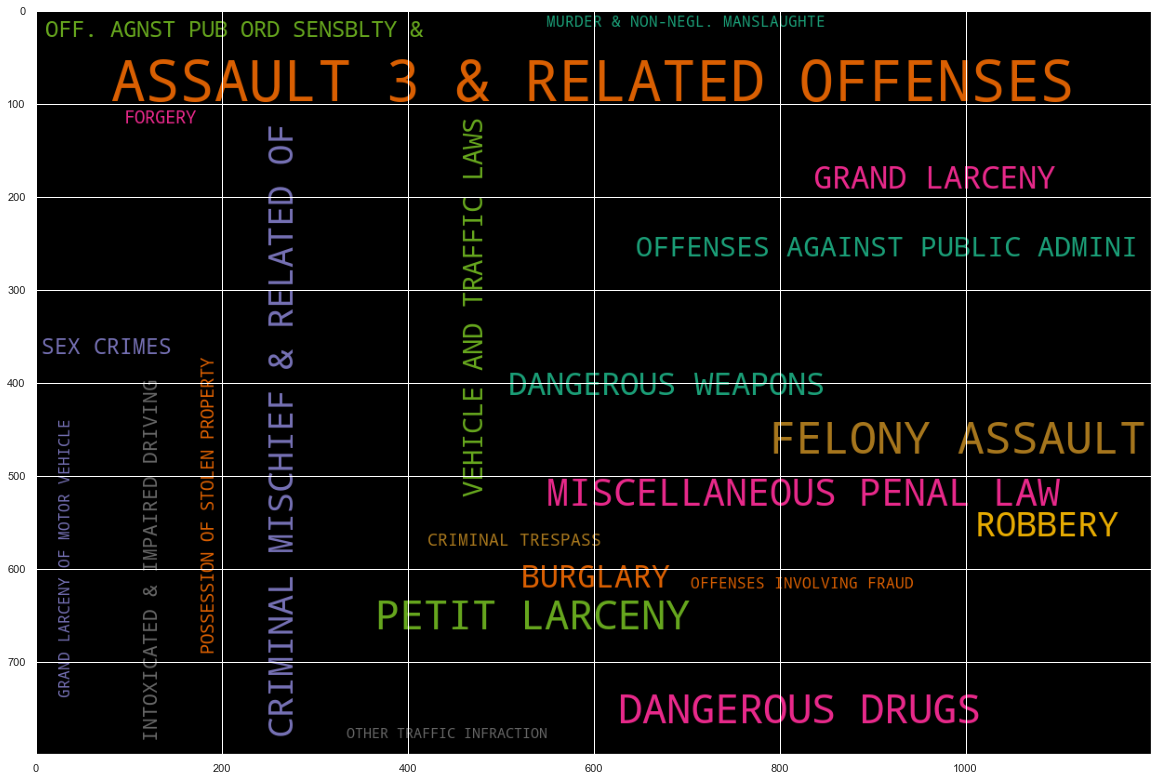

In [232]:
# Most frequent Offenses in All over NYC
wordcloud(new_df, 'OFNS_DESC')

In [237]:
new_df['DAY_OF_WEEK'] = new_df['ARREST_DATE_NEW'].dt.day_name()
# Dataframe for Manhatan
new_df_M =new_df[new_df['ARREST_BORO']=='M']
new_df_Q =new_df[new_df['ARREST_BORO']=='Q']
new_df_B =new_df[new_df['ARREST_BORO']=='B']
new_df_X =new_df[new_df['ARREST_BORO']=='K']
new_df_S =new_df[new_df['ARREST_BORO']=='S']

new_df.head(5)

PD_CD      PD_DESC  KY_CD   OFNS_DESC    LAW_CODE LAW_CAT_CD  \
ARREST_KEY                                                                 
220756993   155.0       RAPE 2  104.0        RAPE  PL 1303001          F   
220422940   157.0       RAPE 1  104.0        RAPE  PL 1303502          F   
218804160   157.0       RAPE 1  104.0        RAPE  PL 1303501          F   
218641095   594.0  OBSCENITY 1  116.0  SEX CRIMES  PL 2631600          F   
217890704   155.0       RAPE 2  104.0        RAPE  PL 1303001          F   

           ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP  ...  \
ARREST_KEY                                                            ...   
220756993            B               41                  0     18-24  ...   
220422940            Q              112                  0     25-44  ...   
218804160            M                7                  2     25-44  ...   
218641095            M                5                  0     25-44  ...   
217890704            K               77                  0     25-44  ...   

           X_COORD_CD Y_COORD_CD   Latitude  Longitude  \
ARREST_KEY                                               
220756993     1013232     236725  40.816392 -73.895296   
220422940     1025420     202485  40.722364 -73.851474   
218804160      988708     200317  40.716508 -73.983920   
218641095      984946     200203  40.716196 -73.997491   
217890704     1003606     185050  40.674583 -73.930222   

                                 New Georeferenced Column  ARREST_DATE_NEW  \
ARREST_KEY                                                                   
220756993   POINT (-73.89529641399997 40.816391847000034)       2020-11-19   
220422940    POINT (-73.85147389399998 40.72236368700004)       2020-11-12   
218804160    POINT (-73.98391989899994 40.71650772200008)       2020-10-06   
218641095   POINT (-73.99749074599998 40.716195914000025)       2020-10-02   
217890704    POINT (-73.93022154099998 40.67458330800008)       2020-09-16   

           ARREST_MONTH ARREST_YEAR    BOROUGH  DAY_OF_WEEK  
ARREST_KEY                                                   
220756993            11        2020      Bronx     Thursday  
220422940            11        2020     Queens     Thursday  
218804160            10        2020  Manhattan      Tuesday  
218641095            10        2020  Manhattan       Friday  
217890704             9        2020   Brooklyn    Wednesday  

[5 rows x 22 columns]

In [238]:
CRIMES_PER_DAY = new_df.groupby('ARREST_DATE_NEW').size()
CRIMES_PER_DAY

ARREST_DATE_NEW
2020-01-01    491
2020-01-02    636
2020-01-03    469
2020-01-04    374
2020-01-05    353
             ... 
2020-12-27    312
2020-12-28    378
2020-12-29    407
2020-12-30    474
2020-12-31    340
Length: 366, dtype: int64

In [239]:
CRIMES_PER_MONTH_NYC = new_df.groupby('DAY_OF_WEEK').size()
#Borough Wise Distribution of Crimes

CRIMES_PER_MONTH_M = new_df_M.groupby('DAY_OF_WEEK').size()
CRIMES_PER_MONTH_Q = new_df_Q.groupby('DAY_OF_WEEK').size()
CRIMES_PER_MONTH_B = new_df_B.groupby('DAY_OF_WEEK').size()
CRIMES_PER_MONTH_X = new_df_X.groupby('DAY_OF_WEEK').size()
CRIMES_PER_MONTH_S = new_df_S.groupby('DAY_OF_WEEK').size()

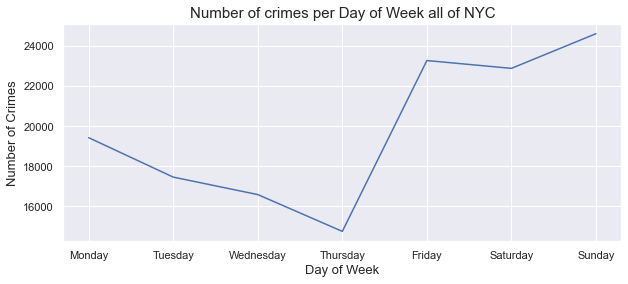

In [240]:
# Number of Crimes on Each Weekday in All Over NYC
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
xt = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.plot(CRIMES_PER_MONTH_NYC)
ax.set_xticklabels(xt)
plt.title('Number of crimes per Day of Week all of NYC', fontsize=15)
plt.xlabel('Day of Week',fontsize=13)
plt.ylabel('Number of Crimes',fontsize=13)
plt.show()

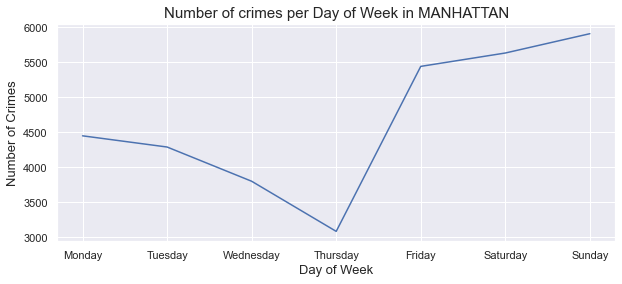

In [241]:
# Number of Crimes on Each Weekday in Manhattan
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
xt = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.plot(CRIMES_PER_MONTH_M)
ax.set_xticklabels(xt)
plt.title('Number of crimes per Day of Week in MANHATTAN', fontsize=15)
plt.xlabel('Day of Week',fontsize=13)
plt.ylabel('Number of Crimes',fontsize=13)
plt.show()

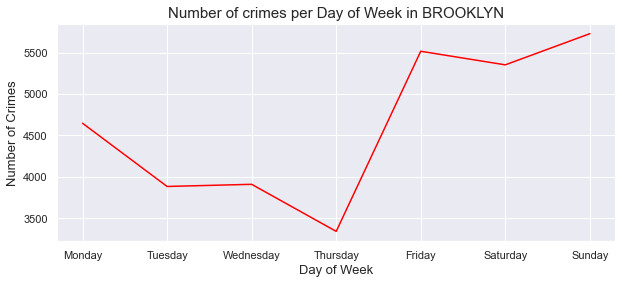

In [242]:
# Number of Crimes on Each Weekday in Brooklyn
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
xt = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.plot(CRIMES_PER_MONTH_B,color='red')
ax.set_xticklabels(xt)
plt.title('Number of crimes per Day of Week in BROOKLYN', fontsize=15)
plt.xlabel('Day of Week',fontsize=13)
plt.ylabel('Number of Crimes',fontsize=13)
plt.show()

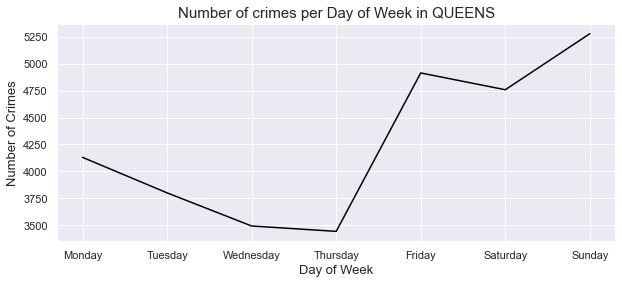

In [243]:
# Number of Crimes on Each Weekday in Queens
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
xt = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.plot(CRIMES_PER_MONTH_Q,color='black')
ax.set_xticklabels(xt)
plt.title('Number of crimes per Day of Week in QUEENS', fontsize=15)
plt.xlabel('Day of Week',fontsize=13)
plt.ylabel('Number of Crimes',fontsize=13)
plt.show()

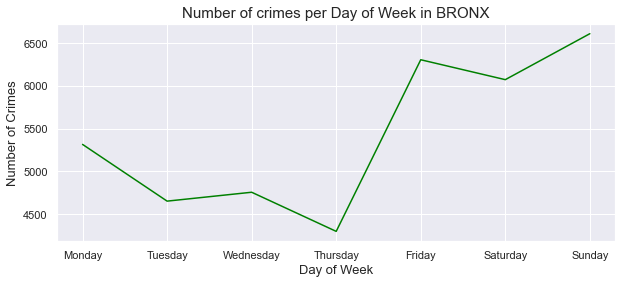

In [244]:
# Number of Crimes on Each Weekday in Bronx
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
xt = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.plot(CRIMES_PER_MONTH_X,color='green')
ax.set_xticklabels(xt)
plt.title('Number of crimes per Day of Week in BRONX', fontsize=15)
plt.xlabel('Day of Week',fontsize=13)
plt.ylabel('Number of Crimes',fontsize=13)
plt.show()

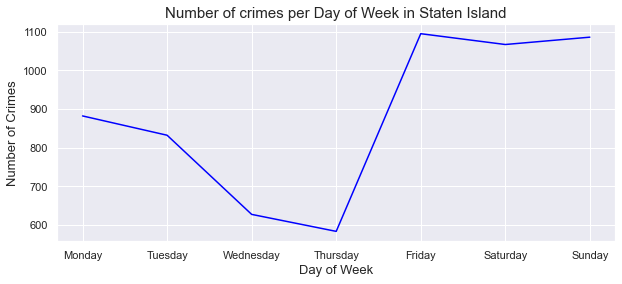

In [245]:
# Number of Crimes on Each Weekday in Staten Island
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
xt = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.plot(CRIMES_PER_MONTH_S,color='blue')
ax.set_xticklabels(xt)
plt.title('Number of crimes per Day of Week in Staten Island', fontsize=15)
plt.xlabel('Day of Week',fontsize=13)
plt.ylabel('Number of Crimes',fontsize=13)
plt.show()

## Key Observations from the above Plots:
   <font color='blue'>
    1. Overall crime numbers in NYC is highest on Sundays and lowest on Thursdays <br>
    2. Trend shows that Crime numbers are lower between Mondays and Tursdays and spikes up on Fridays.<br>
    3. Except for Staten Island, all other boroughs have highest Crime Numbers on Sundays while Staten Island highest numbers on both Fridays and Sundays. 
    </font>

In [246]:
d = {'M':'Manhattan','B':'Bronx','Q':'Queens','K':'Brooklyn','S':'Staten Island'}
new_df['BOROUGH'] = new_df['ARREST_BORO'].map(d)


Text(0.5, 1.0, 'No. of Arrests vs Age Group in each Borough')

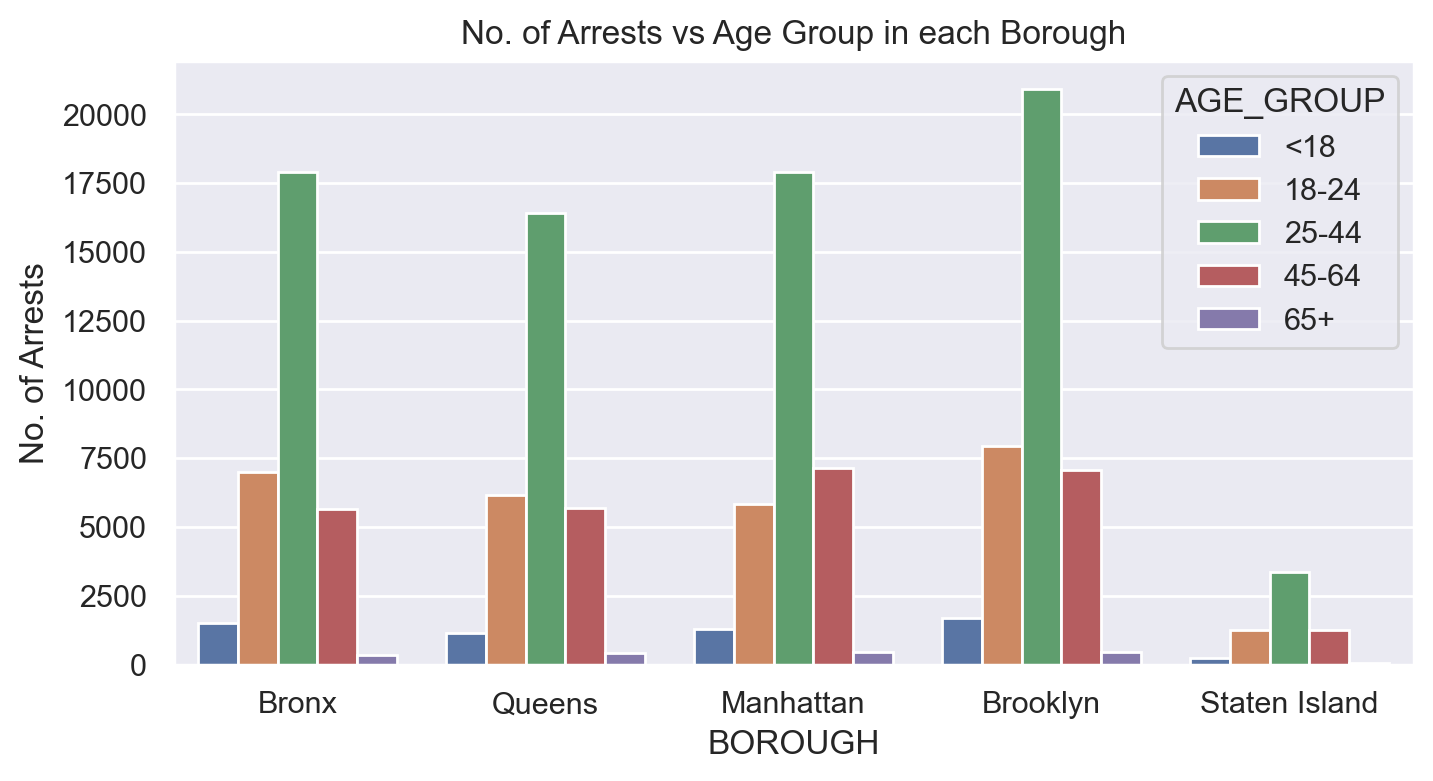

In [247]:
plt.figure(figsize=(8,4),dpi=200)
ax=sns.countplot(x='BOROUGH', data=new_df, hue='AGE_GROUP', hue_order=['<18','18-24','25-44','45-64','65+'] )
plt.ylabel('No. of Arrests')
plt.title('No. of Arrests vs Age Group in each Borough')

# Key Observations:
<font color='blue'>1. In each Borough, Criminal activities are highest among **25-44** Age group </br>
2. Among all the boroughs, **Brooklyn** has the Highest Crime Rate across all the Age Groups
</font>

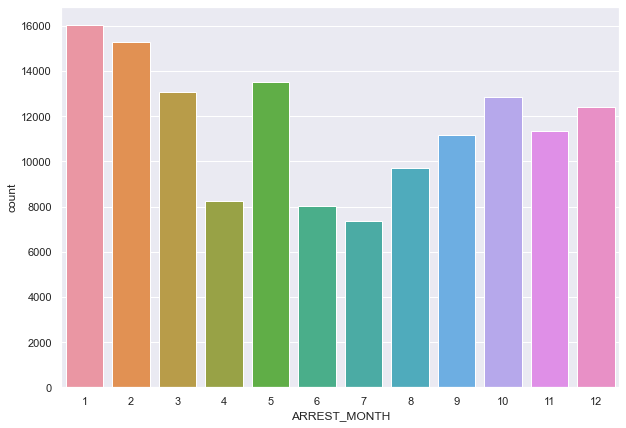

In [248]:
f, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x="ARREST_MONTH", data=new_df)

# <font color='Blue'>Key Observations:</font>
    1. Crime Rate is higher in the Winter Months (Dec-Feb)

In [249]:
#Visualizing The Crime Map in New Yourk City
positions = list(zip(new_df['Latitude'], new_df['Longitude']))
tiles = 'Stamen Terrain'
fol = folium.Map(location=[40.75,-73.98], zoom_start=10, tiles = tiles)
pos_samp = sample(positions, 22000) 
HeatMap(pos_samp, radius = 8).add_to(fol) 
fol

## Cleaning After School Program Dataset

In [250]:
file2 = 'DYCD_after-school_programs.csv'
file2_df = pd.read_csv(file2)

# Rename the Dataframe Columns
file2_df.columns=['PROGRAM_TYPE','PROGRAM','SITE_NAME','BOROUGH_COMMUNITY','AGENCY','CONTACT_NBR','GRADE_AGE_GRP','LOCATION_1','ZIPCODE','LATITUDE','LONGITUDE','COMMUNITY_BOARD','COUNCIL_DIST','CENSUS_TRACT','BIN','BBL','NTA']

# set 
col_list2=file2_df.columns[file2_df.isna().any()].tolist() # ['PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CAT_CD']

# Total No of Rows in the File
total2_row_count = file2_df.shape[0]

# See the Percentage of NaN Values for each of the columns that have NaN values
for i in col_list2:
    col2_null_count = file2_df[file2_df[i].isnull()][i].shape[0]
    null2_percent = (col2_null_count/total2_row_count)*100
    round2_off = str(round(null2_percent, 2))
   # print(i,' ---> ',round2_off,'%')
    
file2_clean = file2_df.dropna()
file2_clean.head(2)
#file2_clean['GRADE_AGE_GRP'].unique()

PROGRAM_TYPE  \
20  Immigration Services,Immigrant Support Service...   
24                                 Jobs & Internships   

                           PROGRAM                 SITE_NAME  \
20                  NDA Immigrants    Make the Road New York   
24  Young Adult Internship Program  NYSARC, Inc. NYC Chapter   

   BOROUGH_COMMUNITY                    AGENCY          CONTACT_NBR  \
20   Jackson Heights    Make the Road New York  718-418-7690 X 205    
24     Staten Island  NYSARC, Inc. NYC Chapter         718.246.1506   

   GRADE_AGE_GRP                                         LOCATION_1  ZIPCODE  \
20         Adult  92 10 Roosevelt Avenue13372\n(41.796904, -73.1...  11372.0   
24      16 to 24  120 Stuyvesant Place10301\n(40.643095488653, -...  10301.0   

     LATITUDE  LONGITUDE  COMMUNITY_BOARD  COUNCIL_DIST  CENSUS_TRACT  \
20  40.748623 -73.874487              4.0          21.0         469.0   
24  40.642992 -74.076954              1.0          49.0           3.0   

          BIN           BBL                                                NTA  
20  4038783.0  4.015500e+09  Elmhurst                                      ...  
24  5000084.0  5.000080e+09  West New Brighton-New Brighton-St. George     ...

In [251]:
boro_list = ['Bronx', 'Staten Island', 'Brooklyn', 'Manhattan' , 'Queens']
after_school_boro = file2_clean[file2_clean['BOROUGH_COMMUNITY'].isin(boro_list)]

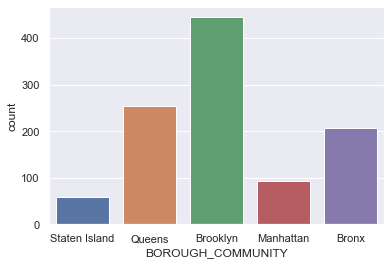

In [252]:
names = after_school_boro.groupby('BOROUGH_COMMUNITY').count().index
sns.countplot(data=after_school_boro,x='BOROUGH_COMMUNITY')

## <font color='blue'>Key Observation: 
    Brooklyn has highest number of After School Activities
</color>

In [253]:
# Heatmap to show After Schhol Activities(In Red) vs Crime 

after_school_location = [] 

for index, row in after_school_boro.iterrows():
    if not math.isnan(row['LATITUDE']) :
        after_school_location.append((row['LATITUDE'], row['LONGITUDE']))
positions_arr = list(zip(new_df['Latitude'], new_df['Longitude']))
fol = folium.Map(location=[40.75,-73.98], zoom_start=11, control_scale=True)

pos_samp = sample(positions_arr, 22000)#22K is the max now as we join both DS togather 
HeatMap(pos_samp, radius = 7).add_to(fol) 

for pos in after_school_location:
    folium.CircleMarker(location=[pos[0],pos[1]], radius=1, color='red', fill=False,).add_to(fol)
fol

## Key Observations:
<font color='Blue'>
    1. Manhattan has less number of After School Actvities but has significantly high Crime rate. <br>
    2. Brooklyn has high crime rate but also has highest number of After school actvities.
</font>

# Multi-Test Regression Model for Crime Prediction in NYC
Create MTR model to predict the loaction of a crime base on some basic features and then using the data lets try to forcast the next month.
Random forest and Gradient Boost Regressors will be the base estimators for the MTR.

In [254]:
new_df.head(2)

PD_CD PD_DESC  KY_CD OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
ARREST_KEY                                                                      
220756993   155.0  RAPE 2  104.0      RAPE  PL 1303001          F           B   
220422940   157.0  RAPE 1  104.0      RAPE  PL 1303502          F           Q   

            ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP  ... X_COORD_CD  \
ARREST_KEY                                                ...              
220756993                41                  0     18-24  ...    1013232   
220422940               112                  0     25-44  ...    1025420   

           Y_COORD_CD   Latitude  Longitude  \
ARREST_KEY                                    
220756993      236725  40.816392 -73.895296   
220422940      202485  40.722364 -73.851474   

                                 New Georeferenced Column  ARREST_DATE_NEW  \
ARREST_KEY                                                                   
220756993   POINT (-73.89529641399997 40.816391847000034)       2020-11-19   
220422940    POINT (-73.85147389399998 40.72236368700004)       2020-11-12   

           ARREST_MONTH ARREST_YEAR  BOROUGH  DAY_OF_WEEK  
ARREST_KEY                                                 
220756993            11        2020    Bronx     Thursday  
220422940            11        2020   Queens     Thursday  

[2 rows x 22 columns]

In [255]:
arrest = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv')
def date_to_weekday(date):
    weekday_dict = {0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
    date_time_obj = datetime.datetime.strptime(date, '%m/%d/%Y')
    return weekday_dict[date_time_obj.weekday()]
def code_to_loc(code):
    code_dict = {'B': 'Bronx', 'S': 'Staten Island', 'K': 'Brooklyn', 'M': 'Manhattan' , 'Q': 'Queens'}
    return code_dict[code]
def code_to_fel(code):
    code_dict = {'F': 'Felony','M': 'Misdemeanor', 'V': 'Violation', 'I': 'Other'}
    if code in code_dict:
        return code_dict[code]
    else:
        return 'Other'

date = arrest['ARREST_DATE'].str.split("/", n = 3, expand = True)
arrest['year'] = date[2].astype('int32')
arrest['day'] = date[1].astype('int32')
arrest['month'] = date[0].astype('int32')

arrest['ARREST_BORO'] = arrest['ARREST_BORO'].apply(code_to_loc)
arrest['WEEKDAY'] = arrest['ARREST_DATE'].apply(date_to_weekday)
arrest['LAW_CAT_CD'] = arrest['LAW_CAT_CD'].apply(code_to_fel)

arrest = arrest.drop(['ARREST_KEY', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD'], axis=1)
arrest[:5]

ARREST_DATE   OFNS_DESC LAW_CAT_CD ARREST_BORO  ARREST_PRECINCT AGE_GROUP  \
0  11/19/2020        RAPE     Felony       Bronx               41     18-24   
1  11/12/2020        RAPE     Felony      Queens              112     25-44   
2  10/06/2020        RAPE     Felony   Manhattan                7     25-44   
3  10/02/2020  SEX CRIMES     Felony   Manhattan                5     25-44   
4  09/16/2020        RAPE     Felony    Brooklyn               77     25-44   

  PERP_SEX       PERP_RACE   Latitude  Longitude  \
0        M           BLACK  40.816392 -73.895296   
1        M           BLACK  40.722364 -73.851474   
2        M           BLACK  40.716508 -73.983920   
3        M           WHITE  40.716196 -73.997491   
4        M  WHITE HISPANIC  40.674583 -73.930222   

                        New Georeferenced Column  year  day  month    WEEKDAY  
0  POINT (-73.89529641399997 40.816391847000034)  2020   19     11   Thursday  
1   POINT (-73.85147389399998 40.72236368700004)  2020   12     11   Thursday  
2   POINT (-73.98391989899994 40.71650772200008)  2020    6     10    Tuesday  
3  POINT (-73.99749074599998 40.716195914000025)  2020    2     10     Friday  
4   POINT (-73.93022154099998 40.67458330800008)  2020   16      9  Wednesday

In [256]:
# Creating an Override to LabelEncoder to ignore the unknown values. 
# This alternate class TolerantLabelEncoder will help avoid the ValueError: y contains previously unseen labels
import numpy as np
class TolerantLabelEncoder(preprocessing.LabelEncoder):
    def __init__(self, ignore_unknown=False,
                       unknown_original_value='unknown', 
                       unknown_encoded_value=-1):
        self.ignore_unknown = ignore_unknown
        self.unknown_original_value = unknown_original_value
        self.unknown_encoded_value = unknown_encoded_value

    def transform(self, y):
        check_is_fitted(self, 'classes_')
        y = column_or_1d(y, warn=True)

        indices = np.isin(y, self.classes_)
        if not self.ignore_unknown and not np.all(indices):
            raise ValueError("y contains new labels: %s" 
                                         % str(np.setdiff1d(y, self.classes_)))

        y_transformed = np.searchsorted(self.classes_, y)
        y_transformed[~indices]=self.unknown_encoded_value
        return y_transformed

    def inverse_transform(self, y):
        check_is_fitted(self, 'classes_')

        labels = np.arange(len(self.classes_))
        indices = np.isin(y, labels)
        if not self.ignore_unknown and not np.all(indices):
            raise ValueError("y contains new labels: %s" 
                                         % str(np.setdiff1d(y, self.classes_)))

        y_transformed = np.asarray(self.classes_[y], dtype=object)
        y_transformed[~indices]=self.unknown_original_value
        return y_transformed

In [257]:
new_df.columns

Index(['PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD',
       'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP',
       'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude',
       'Longitude', 'New Georeferenced Column', 'ARREST_DATE_NEW',
       'ARREST_MONTH', 'ARREST_YEAR', 'BOROUGH', 'DAY_OF_WEEK'],
      dtype='object')

In [258]:
# Train-Test Data:
from sklearn.utils.validation import check_is_fitted, column_or_1d
def cat_to_num(df , col_name):
    #le = preprocessing.LabelEncoder()
    le = TolerantLabelEncoder(ignore_unknown=True)
    new_col = le.fit_transform(df[col_name])
    return le , new_col

est1 = RandomForestRegressor()
model1 = MultiOutputRegressor(estimator=est1)

est2 = GradientBoostingRegressor()
model2 = MultiOutputRegressor(estimator=est2)

new_df.head(2)

#x_reg_train = new_df[new_df['ARREST_MONTH']<12].drop(['LAW_CAT_CD','ARREST_DATE_NEW','OFNS_DESC','ARREST_PRECINCT', 'DAY_OF_WEEK','ARREST_YEAR'],axis = 1)
#x_reg_test = new_df[new_df['ARREST_MONTH']==12].drop(['LAW_CAT_CD','ARREST_DATE_NEW','OFNS_DESC','ARREST_PRECINCT', 'DAY_OF_WEEK', 'ARREST_YEAR'],axis = 1)
x_reg_train = new_df[new_df['ARREST_MONTH']<12].drop(['PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD','ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column', 'ARREST_DATE_NEW',
  'ARREST_YEAR','BOROUGH'],axis = 1)
x_reg_test = new_df[new_df['ARREST_MONTH']==12].drop(['PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC', 'LAW_CODE', 'LAW_CAT_CD','ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'New Georeferenced Column', 'ARREST_DATE_NEW',
  'ARREST_YEAR','BOROUGH'],axis = 1)
y_train = x_reg_train[['Latitude', 'Longitude']]
y_test = x_reg_test[['Latitude', 'Longitude']]

x_reg_train = x_reg_train.drop(['Latitude', 'Longitude'],axis = 1)
x_reg_test = x_reg_test.drop(['Latitude', 'Longitude'],axis = 1)

d = {}
for col in x_reg_train.columns:
    if x_reg_train.dtypes[col] == 'int32':
        continue
    le, new_col = cat_to_num(x_reg_train, col)
    d[col] = le
    x_reg_train[col] = new_col
    x_reg_test[col] = le.transform(x_reg_test[col])
model1.fit(x_reg_train, y_train)
model2.fit(x_reg_train, y_train)


MultiOutputRegressor(estimator=GradientBoostingRegressor())

In [260]:
# Predicting the Regression Values
pred1 = model1.predict(x_reg_test)
pred2 = model2.predict(x_reg_test)
y_test_mean = y_test.mean(axis=0).tolist()
print("The Mean Squared Error of RF = {}\nThe Mean Squared Error of GBR = {} ".format(mean_squared_error(y_test, pred1),mean_squared_error(y_test, pred2)))

The Mean Squared Error of RF = 0.0014327743867625468
The Mean Squared Error of GBR = 0.0013144329347024096 


## Key Observations:<br>
<font color='Blue'>
    1. Gradient Boosting Regressor(GBR) showing better result than Random Forest(RF). <br>    
</font>

In [261]:
future_crime = pd.DataFrame({
    'ARREST_BORO':['Brooklyn','Brooklyn', 'Manhattan','Queens', 'Bronx'], 
    'PERP_SEX':['M', 'F' , 'F', 'M' , 'F'], 
    'PERP_RACE':['BLACK', 'WHITE', 'WHITE HISPANIC', "WHITE" , 'ASIAN / PACIFIC ISLANDER'], 
    'DAY_OF_WEEK':['Sunday', 'Monday', 'Tuesday', 'Sunday', 'Friday'], 
    'AGE_GROUP':['<18', '25-44', '18-24', '45-64', '25-44'],
    'month':[1,3,4,5,2]
    })

In [262]:
future_crime.head()

ARREST_BORO PERP_SEX                 PERP_RACE DAY_OF_WEEK AGE_GROUP  month
0    Brooklyn        M                     BLACK      Sunday       <18      1
1    Brooklyn        F                     WHITE      Monday     25-44      3
2   Manhattan        F            WHITE HISPANIC     Tuesday     18-24      4
3      Queens        M                     WHITE      Sunday     45-64      5
4       Bronx        F  ASIAN / PACIFIC ISLANDER      Friday     25-44      2

In [263]:
for col in future_crime.columns:
    if future_crime.dtypes[col] == 'int64':
        continue
    future_crime[col] = d[col].transform(future_crime[col])

cords1 = model1.predict(future_crime)
cords2 = model2.predict(future_crime)

## <font color='blue'> Predicting Exact Crime Location based on the above Model <br>
       The heatmap shows the crime rate heatmap we saw earlier  <br>
         1. Blue indicates the location predicted by Gradient Boosting Regression <br>
         2. Red indicates the location predicted by Random Forest Regression <br>
    </font>


In [266]:
location_arr= list(zip(new_df['Latitude'], new_df['Longitude']))

fol = folium.Map(location=[40.75,-73.98], zoom_start=11, control_scale=True)

loc_samp = sample(location_arr, 30000)#30K is the max now as we join both DS together 
HeatMap(loc_samp, radius = 9).add_to(fol) 

for pos in cords1:
    folium.CircleMarker(location=[pos[0],pos[1]], radius=3, color='red', fill=True).add_to(fol)
for pos in cords2:
    folium.CircleMarker(location=[pos[0],pos[1]], radius=3, color='blue', fill=True).add_to(fol)
fol